In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
class MultipleLinearRegression:
    """
    A class for custom linear regression.

    Attributes:
        coefficients: Coefficient vector (initialized to 0).

    Methods:
        - train(X_train, Y_train): Fits the linear regression model to the training data.
        - predict(X_test): Predicts target values for test data.
        - optimize_gradient_descent(X_test, Y_test): Performs gradient descent optimization.
        - print_coefficients(): Prints the intercept and coefficients of the model.
        - evaluate_performance(Y_actual, Y_predicted): Computes R-squared and other evaluation metrics.

    Usage:
        model = CustomLinearRegression()
        model.train(X_train, Y_train)
        Y_pred = model.predict(X_test)
        model.print_coefficients()
        model.evaluate_performance(Y_test, Y_pred)
    """

    coefficients = 0  # Initialize coefficient vector

    def train(self, X_train, Y_train):
        """
        Fits the linear regression model to the training data.

        Args:
            X_train: Feature matrix (input data).
            Y_train: Target vector (output data).
        """
        global coefficients
        input_df = X_train.copy()
        input_df.insert(0, "x0", 1)  # Add a column of 1s for the Intercept
        x = np.array([input_df[col] for col in input_df.columns])
        y = np.array([Y_train])

        xt = x.T
        x_xt = x @ xt
        inv_x_xt = np.linalg.inv(x_xt)
        sum_xy = x @ y.T

        coefficients = inv_x_xt @ sum_xy

    def predict(self, X_test):
        """
        Predicts target values for test data.

        Args:
            X_test: Feature matrix for test data.

        Returns:
            y_predicted: Predicted target values.
        """
        input_df = X_test.copy()
        input_df.insert(0, "x0", 1)
        x = np.array([input_df[col] for col in input_df.columns])
        xt = x.T

        y_predicted = xt @ coefficients
        return y_predicted

    def gradient_descent(self, X_test, Y_test):
        """
        Performs gradient descent optimization.

        Args:
            X_test: Feature matrix for test data.
            Y_test: Target vector for test data.
        """
        global coefficients
        input_df = X_test.copy()
        input_df.insert(0, "x0", 1)
        x = np.array([input_df[col] for col in input_df.columns])
        xt = x.T
        coefficients = np.zeros((1, len(input_df.columns)))
        for i in range(100000):
            gradient = (coefficients @ x - np.array([Y_test])) @ xt
            coefficients = (coefficients - 0.00005 * gradient)

    def print_coefficients(self):
        """
        Prints the intercept and coefficients of the model.
        """
        print("Intercept is:", coefficients[0][0])
        print("Coefficients are:", coefficients.reshape(1, -1))

    def evaluate_performance(self, Y_actual, Y_predicted):
        """
        Computes R-squared and other evaluation metrics.

        Args:
            Y_actual: Actual target values.
            Y_predicted: Predicted target values.
        """
        Y_actual = np.array([Y_actual]).T
        mse = (((Y_actual - Y_predicted) ** 2) / len(Y_actual)).sum()
        mae = np.mean(np.abs(Y_actual - Y_predicted))

        rss = ((Y_actual - Y_predicted) ** 2).sum()  # Residual sum of squares
        tss = ((Y_actual - Y_actual.sum() / Y_actual) ** 2).sum()  # Total sum of squares
        r_square = (1 - rss / tss)

        print(f"Mean absolute Error by analyical method : {mae:5f}")
        print(f"Mean square Error by analytical method: {mse:5f}")
        print("R-Square Value:", r_square)


In [18]:
def verify_linear_regression(X_test, Y_test):
  input_df = X_test.copy()
  input_df.insert(0,"x0",1)
  x = np.array([input_df[col] for col in input_df.columns])
  xt = x.T

  model = LinearRegression().fit(xt, np.array(Y_test))
  # check the performance of the model
  y_pred = model.predict(xt)
  r2 = r2_score(Y_test, y_pred)
  mae = mean_absolute_error(Y_test, y_pred)
  mse = mean_squared_error(Y_test, y_pred)
  print(f"Mean squared Error by scikit learn : {mse:5f}")
  print(f"Mean absolute Error by scikit learn : {mae:5f}")
  print(f"R² score of scikit learn is : {r2:.5f}")

Analysis for the DataFrame 1


Coefficients using Numerical Method :- 
Intercept is: 5.680787126761226
Coefficients are: [[5.68078713 2.38406007]]
Coefficients using Gradient Descent Method :- 
Intercept is: 5.680787126760829
Coefficients are: [[5.68078713 2.38406007]]
Mean absolute Error by analyical method : 1.280556
Mean square Error by analytical method: 2.078525
R-Square Value: 0.9998767528263881
Mean squared Error by scikit learn : 2.078525
Mean absolute Error by scikit learn : 1.280556
R² score of scikit learn is : 0.95796


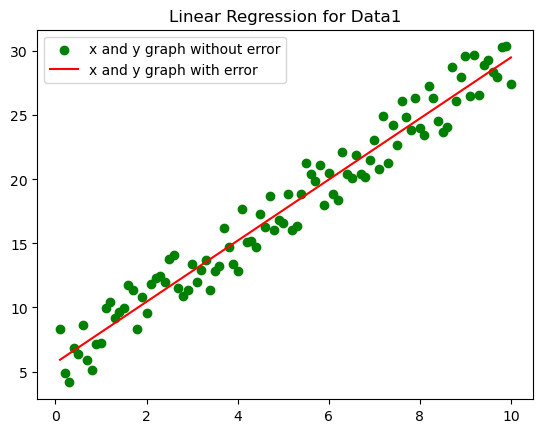

In [19]:
print("Analysis for the DataFrame 1")
print("\n")
df = pd.read_csv("Data1.csv")
model = MultipleLinearRegression()
model.train(df[['x']], df["y"])
y_pred = model.predict(df[['x']])
print("Coefficients using Numerical Method :- ")
model.print_coefficients()
model.gradient_descent(df[['x']], df["y"])
print("Coefficients using Gradient Descent Method :- ")
model.print_coefficients()
model.evaluate_performance(df["y"], y_pred)
verify_linear_regression(df[['x']], df["y"])

# Plotting
plt.scatter(df["x"], df['y'], label='x and y graph without error', color='green')
plt.plot(df["x"], y_pred, color="red", label='x and y graph with error')
plt.title("Linear Regression for Data1")
plt.legend()
plt.show()


Analysis for the DataFrame 2


Coefficients using Numerical Method :- 
Intercept is: -125568.28992133397
Coefficients are: [[-125568.28992133   41603.63156151]]
Coefficients using Gradient Descent Method :- 
Intercept is: -125568.28992132796
Coefficients are: [[-125568.28992133   41603.63156151]]
Mean absolute Error by analyical method : 99929.783297
Mean square Error by analytical method: 27577785853.164066
R-Square Value: 0.4622597809636966
Mean squared Error by scikit learn : 27577785853.164074
Mean absolute Error by scikit learn : 99929.783297
R² score of scikit learn is : 0.34339


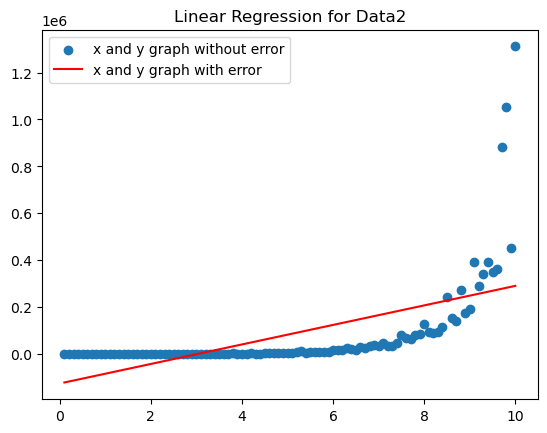

In [20]:
print("Analysis for the DataFrame 2")
print("\n")
df = pd.read_csv("Data2.csv")
model = MultipleLinearRegression()
model.train(df[['x']], df["y"])
y_pred = model.predict(df[['x']])
print("Coefficients using Numerical Method :- ")
model.print_coefficients()
model.gradient_descent(df[['x']], df["y"])
print("Coefficients using Gradient Descent Method :- ")
model.print_coefficients()
model.evaluate_performance(df["y"], y_pred)
verify_linear_regression(df[['x']], df["y"])

# Plotting
plt.scatter(df["x"], df['y'], label='x and y graph without error')
plt.plot(df["x"], y_pred, color="red", label='x and y graph with error')
plt.title("Linear Regression for Data2")
plt.legend()
plt.show()


Analysis for the DataFrame 3


Coefficients using Numerical Method :- 
Intercept is: 1.1770620783119956
Coefficients are: [[1.17706208 0.09419021]]
Coefficients using Gradient Descent Method :- 
Intercept is: 1.1770620783119032
Coefficients are: [[1.17706208 0.09419021]]
Mean absolute Error by analyical method : 0.294678
Mean square Error by analytical method: 0.161730
R-Square Value: 0.999999849734482
Mean squared Error by scikit learn : 0.161730
Mean absolute Error by scikit learn : 0.294678
R² score of scikit learn is : 0.31370


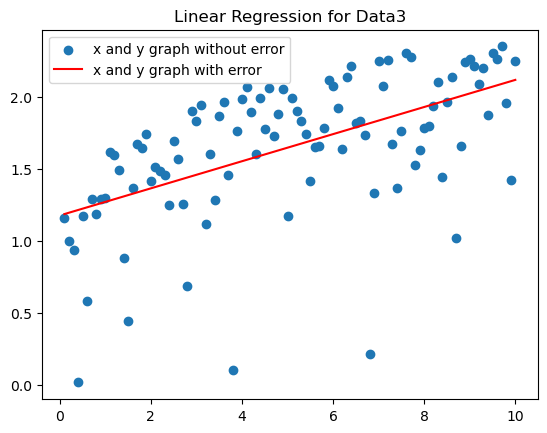

In [21]:
print("Analysis for the DataFrame 3")
print("\n")
df = pd.read_csv("Data3.csv")
model = MultipleLinearRegression()
model.train(df[['x']], df["z"])
y_pred = model.predict(df[['x']])
print("Coefficients using Numerical Method :- ")
model.print_coefficients()
model.gradient_descent(df[['x']], df["z"])
print("Coefficients using Gradient Descent Method :- ")
model.print_coefficients()
model.evaluate_performance(df["z"], y_pred)
verify_linear_regression(df[['x']], df["z"])

# Plotting
plt.scatter(df["x"], df['z'], label='x and y graph without error')
plt.plot(df["x"], y_pred, color="red", label='x and y graph with error')
plt.title("Linear Regression for Data3")
plt.legend()
plt.show()


In [22]:
print("Analysis for the DataFrame 4")
print("\n")
df = pd.read_csv("Data4.csv")
model = MultipleLinearRegression()
model.train(df[['x1', 'x2', 'x3']], df["y"])
y_pred = model.predict(df[['x1', 'x2', 'x3']])
print("Coefficients using Numerical Method :- ")
model.print_coefficients()
model.gradient_descent(df[['x1', 'x2', 'x3']], df["y"])
print("Coefficients using Gradient Descent Method :- ")
model.print_coefficients()
model.evaluate_performance(df["y"], y_pred)
verify_linear_regression(df[['x1', 'x2', 'x3']], df["y"])


Analysis for the DataFrame 4


Coefficients using Numerical Method :- 
Intercept is: 13.239477824456117
Coefficients are: [[13.23947782  6.13243763  2.39226554  7.74681038]]
Coefficients using Gradient Descent Method :- 
Intercept is: 13.23947579325089
Coefficients are: [[13.23947579  6.13243433  2.3922683   7.74681094]]
Mean absolute Error by analyical method : 5.155506
Mean square Error by analytical method: 34.620481
R-Square Value: 0.998297348430483
Mean squared Error by scikit learn : 34.620481
Mean absolute Error by scikit learn : 5.155506
R² score of scikit learn is : 0.98417
